# Поиск приближенных значений корней нелинейных уравнений

## Вариант 6

> <span style="font-style:normal; font-size:12pt;"> 
    <p>С точностью 
        $
        e = 10^{-3}, 10^{-6}, 10^{-9}
        $
        найти приближенное значение корня уравнения, лежащее на интервале (0, 10). Для поиска корня использовать метод дихотомии и метод Ньютона</p>

$$
\begin{equation}
\cos{\frac{1}{1 + x}} + \sin{\frac{3x}{2}} + x - 7 = 0, \ \ \ {x \in (0, 10)}
\end{equation}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# исходная функция
def f(x):
    return np.cos(1 / (1 + x)) + np.sin(3 * x / 2) + x - 7


# первая производная исходной функции
def f_first_deriative(x):
    return np.sin(1 / (1 + x)) / np.power(1 + x, 2) + 3 * np.cos(3 * x / 2) / 2 + 1


# интервал
a = 0
b = 10

In [3]:
x0_plot = np.linspace(a, b, 100)
y0_plot = [f(x) for x in x0_plot]

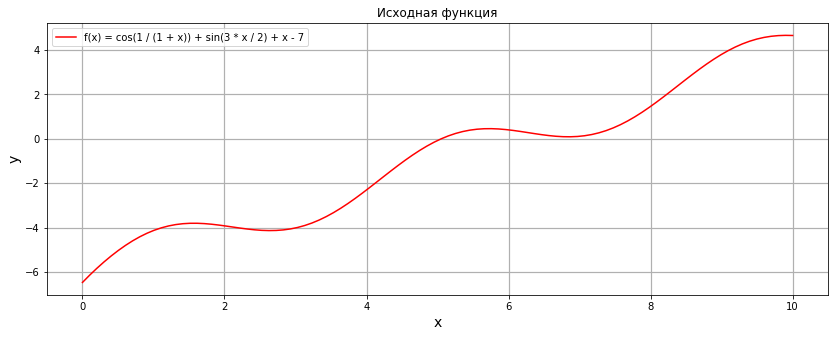

In [4]:
# график исходной функии
fig, ax  = plt.subplots(figsize=(14, 5))

ax.plot(x0_plot, y0_plot, color="red", label='f(x) = cos(1 / (1 + x)) + sin(3 * x / 2) + x - 7')

ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("y", fontsize=14)

plt.title("Исходная функция")
plt.legend()

plt.show()


### Вычисления

In [5]:
# заданные погрешности

errors = []

for n in np.arange(-3, -10, step=-3):
    error = np.float_power(10, n) 
    errors.append(error)
    
errors

[0.001, 1e-06, 1e-09]

#### Метод дихотомии

In [6]:
def dichotomy(func, a, b, error):
    
    if (func(a) * func(b) < 0):
        
        if abs(b - a) > error:
            
            c = (b + a) / 2
                        
            res1, step_val1 = dichotomy(func, a, c, error)
            res2, step_val2 = dichotomy(func, c, b, error)
            
            if res1 != None:
                return res1, step_val1 + 1
            else:
                return res2, step_val2 + 1
    
        else:
        
            if (abs(b) < (abs(a) + error)):
                return b, 0
            else:
                return a, 0
    
    
    elif (func(a) * func(b) == 0):
        if func(a) == 0:
            return a, 0
        else:
            return b, 0
    
    else:
        return None, 0

In [7]:
roots = []
steps = []

for error in errors:
    root,  step_val = dichotomy(f, a, b, error)
    roots.append(root)
    steps.append(step_val)

In [8]:
d = {'roots': roots, 
     'steps': steps,
     'errors': errors
    }
df_dich = pd.DataFrame(data=d)
df_dich

,roots,steps,errors
0,5.051880,14,1.000000e-03
1,5.051620,24,1.000000e-06
2,5.051619,34,1.000000e-09


#### Метод Ньютона (касательных)

In [9]:
def Newton_method(f, x0, error):
    
    while (f_first_deriative(x0) == 0):
        x0 += error
    
    x1 = x0 - f(x0) / f_first_deriative(x0)
    
    if abs(x1 - x0) > error:
        
        res, step_val = Newton_method(f, x1, error)
        return res, step_val + 1
    
    else:
        return x1, 1

In [10]:
# поиск корня с левого конца
roots_a = []
steps_a = []

# поиск корня с правого конца
roots_b = []
steps_b = []

for error in errors:
    
    root_a, step_val_a = Newton_method(f, a, error)
    root_b, step_val_b = Newton_method(f, b, error)
    
    roots_a.append(root_a)
    roots_b.append(root_b)
    
    steps_a.append(step_val_a)
    steps_b.append(step_val_b)

In [11]:
d1 = {'roots_a': roots_a, 
      'steps_a': steps_a,
     }

d2 = {'roots_b': roots_b, 
      'steps_b': steps_b,
     }

df1_newton = pd.DataFrame(data=d1)
df2_newton = pd.DataFrame(data=d2)
errors_series = pd.Series(errors, name = 'errors')

df_newton = pd.concat([df1_newton, df2_newton, errors_series], axis=1)

In [12]:
df_newton

,roots_a,steps_a,roots_b,steps_b,errors
0,5.051619,7,5.051619,120,1.000000e-03
1,5.051619,8,5.051619,121,1.000000e-06
2,5.051619,9,5.051619,122,1.000000e-09


#### Метод хорд (секущих)

In [13]:
def secant_method(f, x0, x1, error):
    
    x2 = x0 - f(x0) * (x0 - x1) / (f(x0) - f(x1))
    
    if abs(x2 - x1) > error:
        
        res, step_val = secant_method(f, x1, x2, error)
        return res, step_val + 1
    
    else:
        return x2, 1

In [14]:
def secant_method_mod(f, c, x0, error):
    
    x2 = x0 - f(x0) * (c - x0) / (f(c) - f(x0))
    
    if abs(x2 - x0) > error:
        
        res, step_val = secant_method_mod(f, c, x2, error)
        return res, step_val + 1
    
    else:
        return x2, 1

In [15]:
# Метод хорд без модификации

# поиск корня с левого конца
roots_a = []
steps_a = []

# поиск корня с правого конца
roots_b = []
steps_b = []

for error in errors:
    
    root_a, step_val_a = secant_method(f, a, a + error, error)
    root_b, step_val_b = secant_method(f, b, b - error, error)
    
    roots_a.append(root_a)
    roots_b.append(root_b)
    
    steps_a.append(step_val_a)
    steps_b.append(step_val_b)

In [16]:
d1 = {'roots_a': roots_a, 
      'steps_a': steps_a,
     }

d2 = {'roots_b': roots_b, 
      'steps_b': steps_b,
     }

df1_sec = pd.DataFrame(data=d1)
df2_sec = pd.DataFrame(data=d2)
errors_series = pd.Series(errors, name = 'errors')

df_sec = pd.concat([df1_sec, df2_sec, errors_series], axis=1)

In [17]:
df_sec

,roots_a,steps_a,roots_b,steps_b,errors
0,5.051623,6,5.051618,6,1.000000e-03
1,5.051619,8,5.051619,7,1.000000e-06
2,5.051619,9,5.051619,8,1.000000e-09


In [18]:
# Метод хорд с модификацией

# поиск корня с левого конца
roots_a_mod = []
steps_a_mod = []

# поиск корня с правого конца
roots_b_mod = []
steps_b_mod = []

for error in errors:
    
    root_a_mod, step_val_a_mod = secant_method_mod(f, a, a + error, error)
    root_b_mod, step_val_b_mod = secant_method_mod(f, b, b - error, error)
    
    roots_a_mod.append(root_a_mod)
    roots_b_mod.append(root_b_mod)
    steps_a_mod.append(step_val_a_mod)
    steps_b_mod.append(step_val_b_mod)

In [19]:
d1_mod = {'roots_a_mod': roots_a_mod, 
          'steps_a_mod': steps_a_mod,
         }

d2_mod = {'roots_b_mod': roots_b_mod, 
          'steps_b_mod': steps_b_mod,
         }

df1_sec_mod = pd.DataFrame(data=d1_mod)
df2_sec_mod = pd.DataFrame(data=d2_mod)
errors_series = pd.Series(errors, name = 'errors')

df_sec_mod = pd.concat([df1_sec_mod, df2_sec_mod, errors_series], axis=1)

In [20]:
df_sec_mod

,roots_a_mod,steps_a_mod,roots_b_mod,steps_b_mod,errors
0,5.051583,6,5.051380,11,1.000000e-03
1,5.051619,9,5.051619,21,1.000000e-06
2,5.051619,12,5.051619,31,1.000000e-09


#### Скорость сходимости

Исследуем скорости сходимости методов

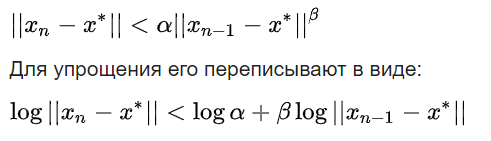

In [21]:
def dichotomy_speed(func, root, x0, x1):
    
    R = 0
    
    if (func(x0) * func(x1) < 0):
        
        if ((root - x1) != 0):
            R = np.log(abs(root - x1)) / np.log(abs(root - x0))
            
            c = (x1 + x0) / 2

            R1 = dichotomy_speed(func, root, x0, c)
            R2 = dichotomy_speed(func, root, x1, c)
            
            if(R1 or R2):
                
                if R1:
                    return R1
                
                else:
                    return R2
        
    return R

In [22]:
def Newton_speed(func, root, x0):
    
    R = 0
    
    while (f_first_deriative(x0) == 0):
        x0 += 1.000000e-09
    
    x1 = x0 - f(x0) / f_first_deriative(x0)
    
    if (root - x1) != 0:    
        
        R = np.log(abs(root - x1)) / np.log(abs(root - x0))
        r = Newton_speed(func, root, x1)
        
        if r:
            return r
    
    return R

In [23]:
def secant_speed(func, root, x0, x1):  
    
    R = 0
    
    while ((root - x1) != 0):
        R = np.log(abs(root - x1)) / np.log(abs(root - x0))
        
        x  = x0
        x0 = x1
        x1 = x - func(x) * (x - x1) / (func(x) - func(x1))
        
    return R

In [24]:
def secant_mod_speed(func, root, c, x0):
    
    R = 0
    x1 = x0
    x0 = c
    
    while ((root - x1) != 0):
        R = np.log(abs(root - x1)) / np.log(abs(root - x0))
    
        x0 = x1
        x1 = x0 - func(x0) * (c - x0) / (func(c) - func(x0))
    
    return R

In [25]:
# корени соответсвующих методов
x_dich    = df_dich['roots'][2]
x_Newton  = df_newton['roots_a'][2]
x_sec     = df_sec['roots_a'][2]
x_sec_mod = df_sec_mod['roots_a_mod'][2]

In [26]:
R_dich    = dichotomy_speed(f, x_dich, a, b)
R_Newton  = Newton_speed(f, x_Newton, a)
R_sec     = secant_speed(f, x_sec, a, a + errors[2])
R_sec_mod = secant_mod_speed(f, x_sec_mod, a, a + errors[2])

In [27]:
print("Dichotomy speed:", R_dich,
      "\nNewton method speed:", R_Newton,
      "\nSecant method speed:", R_sec,
      "\nSecant method modified speed:", R_sec_mod
     )

Dichotomy speed: 1.0 
Newton method speed: 2.026658415974541 
Secant method speed: 1.6309638320544488 
Secant method modified speed: 1.1111479521512153


### Результаты

##### Метод дихотомии

In [28]:
df_dich

,roots,steps,errors
0,5.051880,14,1.000000e-03
1,5.051620,24,1.000000e-06
2,5.051619,34,1.000000e-09


##### Метод Ньютона (касательных)

In [29]:
df_newton

,roots_a,steps_a,roots_b,steps_b,errors
0,5.051619,7,5.051619,120,1.000000e-03
1,5.051619,8,5.051619,121,1.000000e-06
2,5.051619,9,5.051619,122,1.000000e-09


##### Метод хорд (секущих)

In [30]:
df_sec

,roots_a,steps_a,roots_b,steps_b,errors
0,5.051623,6,5.051618,6,1.000000e-03
1,5.051619,8,5.051619,7,1.000000e-06
2,5.051619,9,5.051619,8,1.000000e-09


In [31]:
df_sec_mod

,roots_a_mod,steps_a_mod,roots_b_mod,steps_b_mod,errors
0,5.051583,6,5.051380,11,1.000000e-03
1,5.051619,9,5.051619,21,1.000000e-06
2,5.051619,12,5.051619,31,1.000000e-09


#### Скорость сходимости

In [32]:
print("Dichotomy speed:", R_dich,
      "\nNewton method speed:", R_Newton,
      "\nSecant method speed:", R_sec,
      "\nSecant method modified speed:", R_sec_mod
     )

Dichotomy speed: 1.0 
Newton method speed: 2.026658415974541 
Secant method speed: 1.6309638320544488 
Secant method modified speed: 1.1111479521512153
